In [1]:
from prospect_experiments2 import *
import pandas as pd
%matplotlib notebook

In [2]:
# Sensor wavelenght [nm]
wl = [550., 660., 735., 790.]

# Leaf samples reflectances
rho_leaf = pd.read_excel('C:/Users/SNMACIAS/Documents/CIMMYT/Drone_missions/eBee/x_analysis/refl_db.xlsx',\
                         sheet_name = 'leaf')
rho_leaf_ = np.asarray(rho_leaf)

### A. One leaf sample

In [4]:
# Select leaf sample (first index)
l = 1
g, r, re, nir = rho_leaf_[l][6], rho_leaf_[l][7], rho_leaf_[l][8], rho_leaf_[l][9]

# Join band and leaf reflectance
leaf = (wl, [g, r, re, nir])

# One leaf sample
rho_leaf_[0][6]

0.141326045283564

In [ ]:
# Inverse mode: Maximum Likelihood
x0 = np.array([1.7, 20., 10., 0.2, 0.015, 0.001, 8.])
retval = max_lklhood(x0, leaf[0], leaf[1], np.ones(4)*0.007)
print retval

In [ ]:
# Forward mode (N, cab, car, cbrown, cw, cm, ant)
x_truth = retval.x #np.array([1.92, 14., 7., 0.3, 0.015, 0.002, 3.])
rho_pred = fwd_model(x_truth, np.ones(2101)*0.002, leaf)

### B. All leaf samples

In [ ]:
# Inverse mode: Maximum Likelihood
x0 = np.array([1.7, 20., 10., 0.2, 0.015, 0.001, 8.])

solution = []
for i in range(rho_leaf_.shape[0]):
    g, r, re, nir = rho_leaf_[i][6], rho_leaf_[i][7], rho_leaf_[i][8], rho_leaf_[i][9]
    leaf = (wl, [g, r, re, nir])
    retval = max_lklhood(x0, leaf[0], leaf[1], np.ones(4)*0.007)
    solution.append(retval.x)
solution = np.asarray(solution)

In [ ]:
solution[0]

In [ ]:
# Write solution to file
#f = 'C:/Users/SNMACIAS/Documents/CIMMYT/Drone_missions/eBee/x_analysis/prospect_test/prospect_sol.csv'
#np.savetxt(f, solution, delimiter=",")

In [ ]:
# Forward mode (N, cab, car, cbrown, cw, cm, ant)
x_truth = solution[1]
rho_pred = fwd_model(x_truth, np.ones(2101)*0.002, leaf)

### D. Other solutions

In [ ]:
# Inverse mode: Least squares
x0 = np.array([1.7, 20., 10., 0.2, 0.015, 0.001, 8.])
retval = least_squares(x0, leaf[0], leaf[1], np.ones(4)*0.007)
print retval

In [ ]:
# Inverse mode: Bayesian
mu_prior = np.array([2.2, 40., 5., 0.1, 0.015, 0.009, 8])
cov = np.array([2.1, 10., 0.01, 0.01, 0.0001, 0.0001, 1.])
inv_cov = np.diag(1./cov**2)
retval = variational_prospect(mu_prior, inv_cov, leaf[0], leaf[1], np.ones(4)*0.007)

### E. Data from LOPEX' 93 experiment

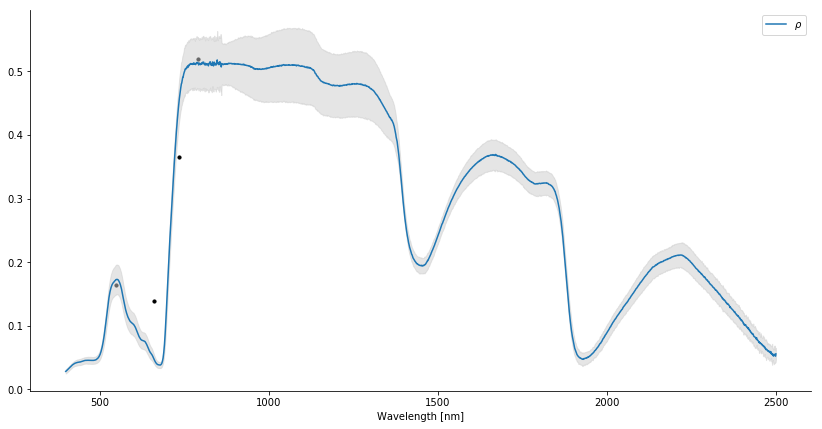

In [16]:
# Load data from LOPEX'93, sample #

#      English                    Italiano               Francais              Latinus
#12  m  Maize 1                    Mais 1                 Mais 1                Zea mays
#16  m  Maize 3 (1/2)              Mais 3                 Mais 3                Zea mays
#26  m  Maize 3 (2/2)              Mais 3                 Mais 3                Zea mays
#58  m  Maize 2                    Mais 2                 Mais 2                Zea mays
#77  m  Maize (1/2)                Mais                   Mais                  Zea mays
#80  m  Maize (2/2)                Mais                   Mais                  Zea mays
#81  m  Maize half dry             Mais                   Mais deseche          Zea mays
#78  m  Maize dry                  Mais secco             Mais sec              Zea mays
#34  m  Stalks of maize 2          Steli di mais 2        Tiges de mais 2       Zea mays
#68  *  Maize starch               Amido di mais          Amidon de mais        *
#95  m  Maize stalks               Steli di mais          Tiges de Mais         Zea mays

#43  m  Ear of salmone wheat (1/2) Spiga di frumento      Epi de ble            Triticum aestivum
#44  m  Ear of pandas wheat (1/2)  Spiga di frumento      Epi de ble            Triticum aestivum
#47  m  Ear of pandas wheat (2/2)  Spiga di frumento      Epi de ble            Triticum aestivum
#48  m  Ear of salmone wheat (2/2) Spiga di frumento      Epi de ble            Triticum aestivum
#69  *  Wheat starch               Amido di frumento      Amidon de ble         *
#70  *  Wheat bran                 Crusca di frumento     Son de ble            *

#40  m  Rice (1/2)                 Riso                   Riz                   Oryza sativa
#50  m  Rice (2/2)                 Riso                   Riz                   Oryza sativa
#116 m  Rice                       Riso                   Riz                   Oryza sativa
#42  m  Rye ear (1/2)              Spiga di segale        Epi de seigle         Secale cereale
#49  m  Rye ear (2/2)              Spiga di segale        Epi de seigle         Secale cereale
#67  *  Rice starch                Amido di riso          Amidon de riz         *
#117 *  Rice (whole grain)         Riso (con glumi)       Riz (avec glumes)     *
#118 *  Rice (husks)               Riso (glumi)           Riz (glumes)          *
#119 *  Rice (whole grain)         Riso (integrale)       Riz (entier)          *
#120 *  Rice parboiled             Riso bianco            Riz blanc             *
#110 m  Rice stalks                Steli di riso          Tiges de riz          Oryza sativa

rho, rho_unc = read_lopex_sample(40, leaf, do_plot=True) # 6,11,12,19,36,40,45,50*,80,86**,99,100*,105,106,107*,113,116**

### Miscelaneous

In [ ]:
# (N, cab, car, cbrown, cw, cm, ant)
for i in np.linspace(0.24, 0.25, 1):
    x = np.array([1.82, 15., 7., i, 0.01, 0.001, 3.])
    rho_pred = fwd_model(x, np.ones(2101)*0.002, leaf)

In [ ]:
# 
x = np.array([1.82, 15., 7., 0.25, 0.01, 0.001, 3.])
rho_pred = fwd_model(x, np.ones(2101)*0.001, leaf)

In [ ]:
#l001 = [0.1413, 0.1110, 0.4061, 0.5243]
#f = open('C:/Users/SNMACIAS/Documents/CIMMYT/Drone_missions/eBee/x_analysis/prospect_test/prospect_sol.csv', 'ab')